# Hectare Estimation Data: A Comparison between FAOSTAT and University of Malysia Estimates

## Python Imports

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import contextily as cx
import rtree
from zlib import crc32
import hashlib
from shapely.geometry import Point, LineString, Polygon
import numpy as np
from scipy.spatial import cKDTree
from geopy.distance import distance


### Dependencies 

* Geopandas
* pandas
* openpyxl

## Plan

### Data Imports

* /Users/jnapolitano/Projects/wattime-takehome/data/harvest_2015-2021.xlsx
* /Users/jnapolitano/Projects/wattime-takehome/data/FAOSTAT_data_rice_hectares_formatted.csv

### Import Data Frames
Since jupyter caches the data to the notebook json I can import the dataframes that I will be using together.

If I were to build automated scripts to perform the analysis I would only load the data necessary to perform a process. 

### Experiment with Plots for each Set
I don't know exactly which plots I want to include in the final report. 

I 'll plot a few for each data set 

### Calculate differences between the datasets
* create a differences data frame
* write to file for use
* plot



## University of Malaysia Hectare Estimates

In [75]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/harvest_2015-2021.xlsx"

malaysia_hectares_df = pd.read_excel(filepath)

### Print Df Head

In [109]:
malaysia_hectares_df.head()

,iso3_country,country_name,harvest_ha_2015,harvest_ha_2016,harvest_ha_2017,harvest_ha_2018,harvest_ha_2019,harvest_ha_2020,harvest_ha_2021
0,BGD,Bangladesh,11722099,11390790,10494788,10706153,10354925,10533907,9919869
1,BRA,Brazil,1705117,1552095,1862587,1858515,1647357,2451437,2272437
2,CHN,China,30668234,29297656,31775354,27069813,28016761,32011764,30341048
3,ESP,Spain,57073,66740,60865,70270,57416,65273,42658
4,IDN,Indonesia,6418245,5115649,4807663,5884907,6333339,5940978,5049681


### Print Descriptive Statistics

In [77]:
malaysia_hectares_df.describe()

,harvest_ha_2015,harvest_ha_2016,harvest_ha_2017,harvest_ha_2018,harvest_ha_2019,harvest_ha_2020,harvest_ha_2021
count,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01
mean,9.459819e+06,9.188369e+06,9.321807e+06,9.081090e+06,9.752046e+06,1.035578e+07,9.245002e+06
std,2.374926e+07,2.289243e+07,2.348346e+07,2.284054e+07,2.458635e+07,2.609555e+07,2.333312e+07
min,5.707300e+04,6.674000e+04,5.840300e+04,5.048400e+04,5.741600e+04,6.527300e+04,4.265800e+04
25%,4.874842e+05,4.589752e+05,4.695788e+05,4.491555e+05,4.808172e+05,4.540728e+05,4.142115e+05
50%,1.428924e+06,1.347080e+06,1.608528e+06,1.343571e+06,1.406693e+06,1.824500e+06,1.504528e+06
75%,6.496200e+06,6.695243e+06,5.874084e+06,6.060500e+06,6.337192e+06,6.300202e+06,5.399556e+06
max,1.135178e+08,1.102604e+08,1.118617e+08,1.089731e+08,1.170246e+08,1.242694e+08,1.109400e+08


### Get Year Columns for Convenience

In [78]:
malaysia_numeric_columns_list = malaysia_hectares_df.select_dtypes(np.number).columns.tolist()


### Plots

#### University of Malaysia Bar Plot

<AxesSubplot:ylabel='Country Name'>

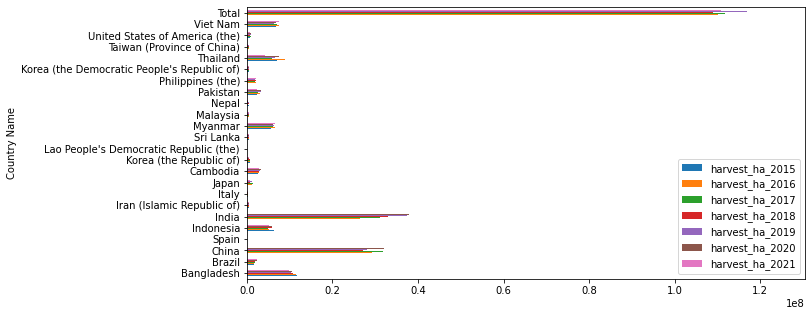

In [79]:
malaysia_hectares_df.plot(kind = "barh", x = 'country_name', xlabel = "Country Name", ylabel = "Hectares Harvested", figsize = (10,5))

#### University of Malaysia Density Plot

<AxesSubplot:ylabel='Density'>

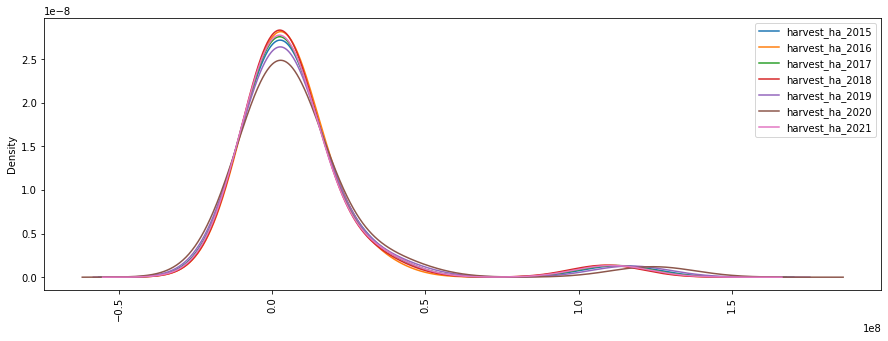

In [80]:
malaysia_hectares_df.plot(rot = 90, kind = "density", figsize = (15,5)) 

## FAOSTAT Data 

In [92]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/FAOSTAT_data_rice_hectares_formatted.csv"

faostat_hectares_df = pd.read_csv(filepath)

### Print FAOSTAT Head

In [93]:
## I didn't write the index to the csv file in the previous step.  IF time permits go back and fix this error
faostat_hectares_df.head()


,Unnamed: 0,country_name,2015,2016,2017,2018,2019,2020
0,0,Bangladesh,11381221.0,11000809.0,11615000.0,11515000.0,11515545.0,11417745.0
1,1,Brazil,2138397.0,1943938.0,2006202.0,1872155.0,1710063.0,1677705.0
2,2,Cambodia,2799126.0,2889449.0,2972213.0,3036117.0,2964493.0,2917391.0
3,3,"China, Taiwan Province of",251861.0,273837.0,274677.0,271506.0,270066.0,261784.0
4,4,"China, mainland",30784000.0,30746000.0,30747190.0,30189450.0,29690000.0,30080000.0


#### Drop the old index

In [94]:
faostat_hectares_df.drop(["Unnamed: 0"], axis = 1, inplace = True)


### FaoSTAT PLOTS

#### FAOSTAT Hectare Estimates Bar Plot

<AxesSubplot:ylabel='Country Name'>

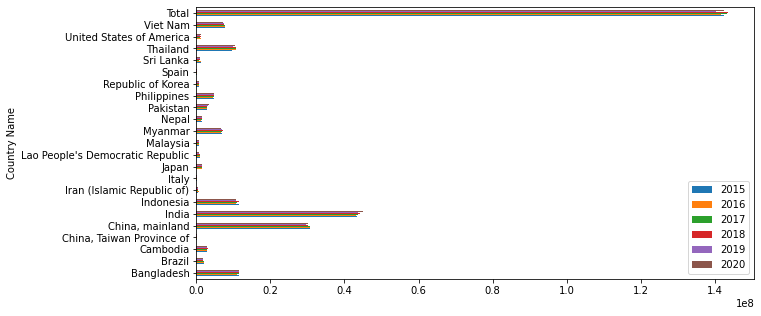

In [95]:
faostat_hectares_df.plot(kind = "barh", x = 'country_name', y = ['2015','2016', '2017', '2018', '2019', '2020'], xlabel = "Country Name", ylabel = "Hectares Harvested", figsize = (10,5))

### FAOSTAT Density Plot

<AxesSubplot:ylabel='Density'>

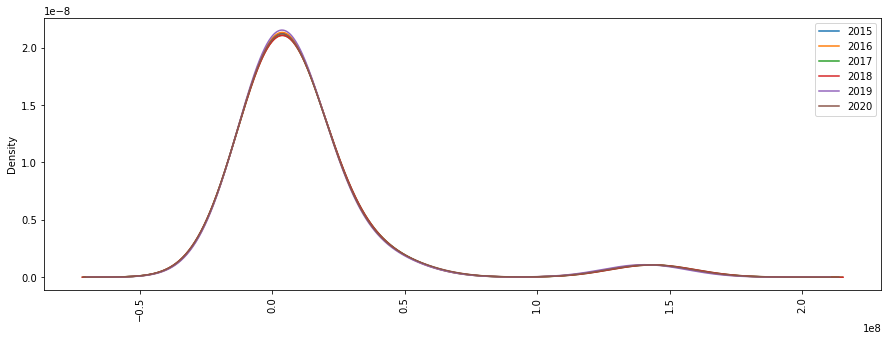

In [96]:
faostat_hectares_df.plot(rot = 90, kind = "density",y = ['2015','2016', '2017', '2018', '2019', '2020'], figsize = (15,5)) 

## Join Df's by Code... Hoping they're the same.

### Convert Ints to string in both dataframes

In [100]:
faostat_hectares_df = faostat_hectares_df.astype(str)
malaysia_hectares_df = malaysia_hectares_df.astype(str)


In [116]:
malaysia_hectares_df.loc["Bangladesh"]

KeyError: 'Bangladesh'

In [106]:
faostat_hectares_df['2015']

0      11381221.0
1       2138397.0
2       2799126.0
3        251861.0
4      30784000.0
5      43390000.0
6      11389000.0
7        529967.0
8        227331.0
9       1589000.0
10       965152.0
11       681559.0
12      6769494.0
13      1425346.0
14      2739495.0
15      4656227.0
16       799344.0
17       109290.0
18      1243345.0
19      9717975.0
20      1042080.0
21      7828607.0
22    142457817.0
Name: 2015, dtype: object

In [107]:
faostat_hectares_df.merge(malaysia_hectares_df, on='country_name', how='left', sort=False)

,country_name,2015,2016,2017,2018,2019,2020,iso3_country,harvest_ha_2015,harvest_ha_2016,harvest_ha_2017,harvest_ha_2018,harvest_ha_2019,harvest_ha_2020,harvest_ha_2021
0,Bangladesh,11381221.0,11000809.0,11615000.0,11515000.0,11515545.0,11417745.0,BGD,11722099,11390790,10494788,10706153,10354925,10533907,9919869
1,Brazil,2138397.0,1943938.0,2006202.0,1872155.0,1710063.0,1677705.0,BRA,1705117,1552095,1862587,1858515,1647357,2451437,2272437
2,Cambodia,2799126.0,2889449.0,2972213.0,3036117.0,2964493.0,2917391.0,KHM,2477348,2865851,2258524,2796305,2973638,3206400,2822447
3,"China, Taiwan Province of",251861.0,273837.0,274677.0,271506.0,270066.0,261784.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"China, mainland",30784000.0,30746000.0,30747190.0,30189450.0,29690000.0,30080000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,India,43390000.0,43190000.0,43774070.0,44156450.0,43780000.0,45000000.0,IND,31099433,26547064,31142254,32948990,37507779,37998818,32839797
6,Indonesia,11389000.0,10600000.0,10900000.0,11377934.0,10677887.0,10657275.0,IDN,6418245,5115649,4807663,5884907,6333339,5940978,5049681
7,Iran (Islamic Republic of),529967.0,596035.0,396877.0,427373.0,420349.0,422746.0,IRN,438720,459006,481011,443787,475010,480013,452676
8,Italy,227331.0,234133.0,234133.0,217190.0,220030.0,227320.0,ITA,249798,246889,272184,223495,228346,255077,254488
9,Japan,1589000.0,1570000.0,1557000.0,1470000.0,1470000.0,1462000.0,JPN,1152732,1142066,1354468,774127,1166029,1417582,787003
